In [1]:
import numpy as np
import pandas as pd
import math
import numpy.random as rand
import scipy
from scipy.stats import binom as binomial
from scipy.stats import beta as betafunction
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pickle
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True) #Want to be able to use tex in the plot labels

import seaborn
seaborn.set_style('ticks')
seaborn.set_color_codes()


In [2]:
#Load in chains run using all three datasets from fake data:
samples = []
i = 0
burnin = 1000
for line in open('chains/fakedata/veff0.5/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples50 = np.array(samples)
samples50 = samples50.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.6/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples60 = np.array(samples)
samples60 = samples60.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.7/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples70 = np.array(samples)
samples70 = samples70.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.8/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples80 = np.array(samples)
samples80 = samples80.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.9/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples90 = np.array(samples)
samples90 = samples90.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff1.0/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples100 = np.array(samples)
samples100 = samples100.astype(float)

In [5]:
#Actual data
Data_pd = pd.read_csv("../Data/FakeData50_veff0.6.csv",header=None)
Data60 = Data_pd.as_matrix()
vo60 = Data60[:,0].copy()
vt60 = Data60[:,1].copy()
so60 = Data60[:,2].copy()
st60 = Data60[:,3].copy()
cobs60 = Data60[:,4].copy()

total_cases60 = np.sum(cobs60[:])

vobs60 = vo60.copy()
vtry60 = vt60.copy()
sobs60 = so60.copy()
stry60 = st60.copy()


Data_pd = pd.read_csv("../Data/FakeData50_veff0.9.csv",header=None)
Data90 = Data_pd.as_matrix()
vo90 = Data90[:,0].copy()
vt90 = Data90[:,1].copy()
so90 = Data90[:,2].copy()
st90 = Data90[:,3].copy()
cobs90 = Data90[:,4].copy()
total_cases90 = np.sum(cobs90[:])

vobs90 = vo90.copy()
vtry90 = vt90.copy()
sobs90 = so90.copy()
stry90 = st90.copy()


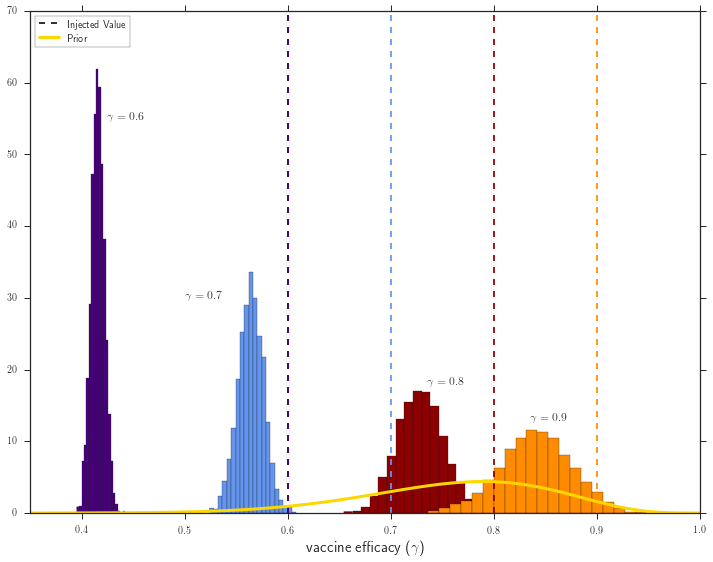

In [6]:
#Look at v_eff:

x = np.linspace(0,1,100)
y = scipy.stats.beta.pdf(x,a=16.,b=5.)
#veff50,b,c = plt.hist(samples50[:,6],bins=20, normed=True)
plt.figure(figsize=(4*3,3*3))
veff60,b,c = plt.hist(samples60[:,6],bins=20, normed=True, color ='indigo')
plt.axvline(0.6,c='k',ls='--',label='Injected Value')
plt.axvline(0.6,c='indigo',ls='--')
veff70,b,c = plt.hist(samples70[:,6],bins=20, normed=True, color = 'cornflowerblue')
plt.axvline(0.7,c='cornflowerblue',ls='--')
veff80,b,c = plt.hist(samples80[:,6],bins=20, normed=True, color = 'darkred')
plt.axvline(0.8,c='darkred',ls='--')
veff90,b,c = plt.hist(samples90[:,6],bins=20, normed=True, color = 'darkorange')
plt.axvline(0.9,c='darkorange',ls='--')
#veff100,b,c = plt.hist(samples100[:,6],bins=20, normed=True, color ='darkdarkgreen')
plt.plot(x,y,color='gold',lw=3, label='Prior')
plt.legend(loc='upper left',frameon=True)
plt.annotate('$\gamma = 0.6$',(0.425,55),fontsize=12)
plt.annotate('$\gamma = 0.7$',(0.5,30),fontsize=12)
plt.annotate('$\gamma = 0.8$',(0.735,18),fontsize=12)
plt.annotate('$\gamma = 0.9$',(0.835,13),fontsize=12)
plt.xlim(0.35,1)
plt.ylim(0,70)
plt.xlabel('vaccine efficacy ($\gamma$)',fontsize=15)

plt.savefig('veff_fakedata_vaxserocase.pdf')

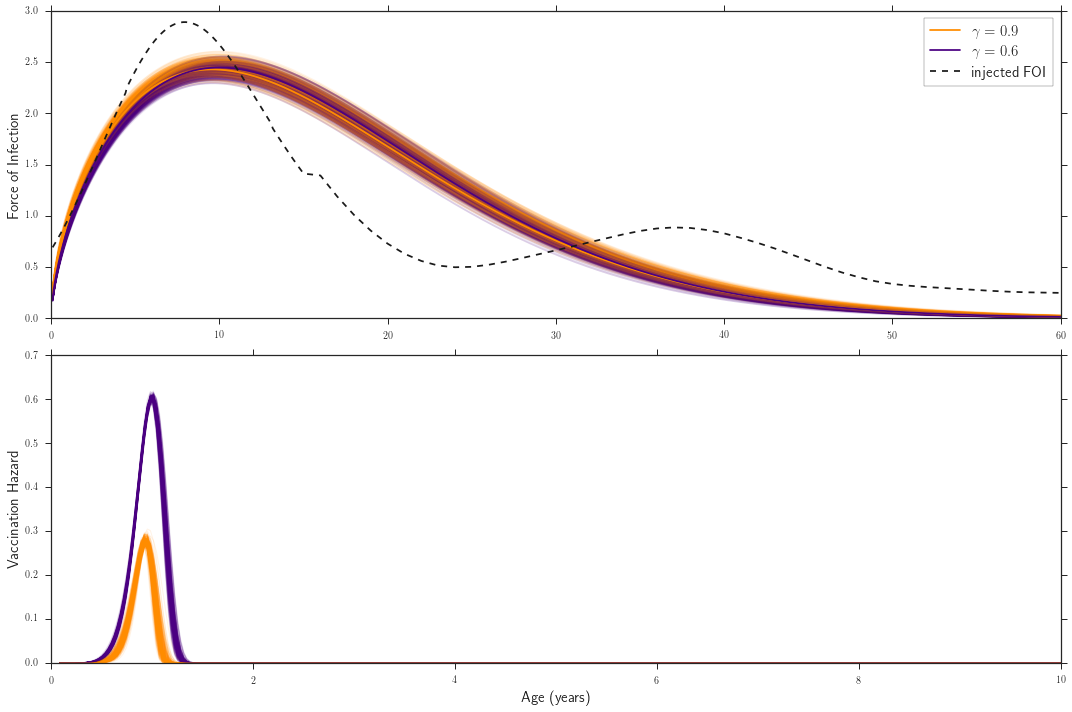

In [7]:
#Look at vh and foi:
foiinj = np.genfromtxt('../Simulations/foi_injected.csv',delimiter=',') #injected foi
nspace = 2000
x = np.linspace(1,60*12,nspace)
foi50 = np.zeros(nspace)
foi60 = np.zeros(nspace)
foi70 = np.zeros(nspace)
foi80 = np.zeros(nspace)
foi90 = np.zeros(nspace)

vhaz60 = np.zeros(nspace)
vhaz70 = np.zeros(nspace)
vhaz80 = np.zeros(nspace)
vhaz90 = np.zeros(nspace)

l = len(samples60[:,0])
l = 2000
nplot = 300
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
ax0, ax1 = axes.flatten()

for k in range(nplot):
    index = np.random.randint(l)
    
    va60 = samples60[index,0] 
    vb60 = samples60[index,1] 
    vh60 = samples60[index,2]  
    fa60 = samples60[index,3] 
    fb60 = samples60[index,4] 
    fh60 = samples60[index,5] 
    ve60 = samples60[index,6]
    
    va70 = samples70[index,0] 
    vb70 = samples70[index,1] 
    vh70 = samples70[index,2]  
    fa70 = samples70[index,3] 
    fb70 = samples70[index,4] 
    fh70 = samples70[index,5] 
    ve70 = samples70[index,6]
    
    va80 = samples80[index,0] 
    vb80 = samples80[index,1] 
    vh80 = samples80[index,2] 
    fa80 = samples80[index,3] 
    fb80 = samples80[index,4] 
    fh80 = samples80[index,5] 
    ve80 = samples80[index,6] 

    
    va90 = samples90[index,0] 
    vb90 = samples90[index,1] 
    vh90 = samples90[index,2] 
    fa90 = samples90[index,3] 
    fb90 = samples90[index,4] 
    fh90 = samples90[index,5] 
    ve90 = samples90[index,6] 

    
    j = 0
    for i in x:
        a = float(i)
        foi90[j] = fh90*(a/fb90)**(fa90-1.)*np.exp(-(a/fb90)**(fa90))
        vhaz90[j] = vh90*(a/vb90)**(va90-1.)*np.exp(-(a/vb90)**(va90))
        
        foi60[j] = fh60*(a/fb60)**(fa60-1.)*np.exp(-(a/fb60)**(fa60))
        vhaz60[j] = vh60*(a/vb60)**(va60-1.)*np.exp(-(a/vb60)**(va60))
        j += 1
    ax0.plot(x/12.,foi90,alpha=0.1,color='darkorange')
    ax0.plot(x/12.,foi60,alpha=0.1,color='indigo')
    ax1.plot(x/12.,vhaz90,alpha=0.1,color='darkorange',linewidth=1)
    ax1.plot(x/12.,vhaz60,alpha=0.1,color='indigo',linewidth=1)

ax0.plot(x/12.,foi90,alpha=1.,color='darkorange',label='$\gamma = 0.9$')   
ax0.plot(x/12.,foi60,alpha=1.,color='indigo',label='$\gamma = 0.6$')
ax0.plot(foiinj[:,0]/12.,foiinj[:,1]/10.,'k--',label='injected FOI')
ax0.set_ylabel('Force of Infection',fontsize=15)
ax1.set_ylabel('Vaccination Hazard',fontsize=15)
ax0.legend(fontsize=15,frameon=True)
ax1.set_xlim(0,10)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('foi_vhaz_fakedata_vaxserocase.pdf')

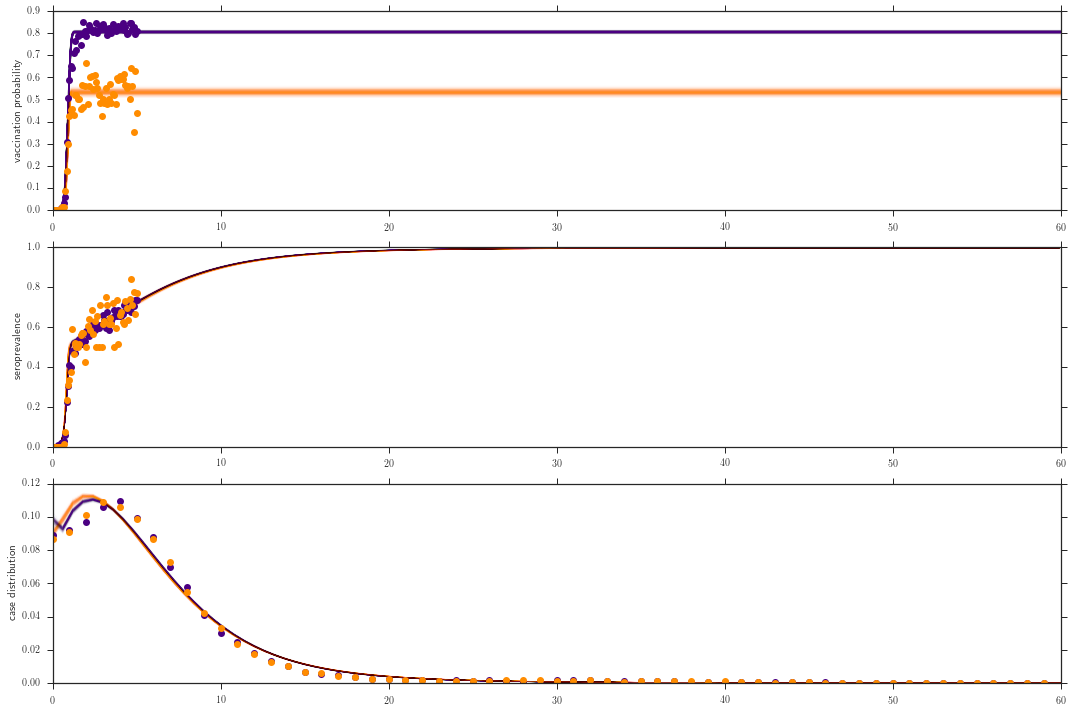

In [16]:
#Look at predicted vaccination level, seroprevalence, and case count:
nspace = 1200
x = np.linspace(1,60*12,nspace)
xplot = np.linspace(1,60,60)
xy = np.linspace(1,60,nspace)
cplot9 = np.zeros(nspace)
vplot9 = np.zeros(nspace)
splot9 = np.zeros(nspace)
cplot6 = np.zeros(nspace)
vplot6 = np.zeros(nspace)
splot6 = np.zeros(nspace)

l = len(samples60[:,0])
nplot = 300
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
ax0, ax1, ax2 = axes.flatten()
for k in range(nplot):
    index = np.random.randint(l)
    
    va60 = samples60[index,0] 
    vb60 = samples60[index,1] 
    vh60 = samples60[index,2]  
    fa60 = samples60[index,3] 
    fb60 = samples60[index,4] 
    fh60 = samples60[index,5] 
    ve60 = samples60[index,6]
    
    va90 = samples90[index,0] 
    vb90 = samples90[index,1] 
    vh90 = samples90[index,2] 
    fa90 = samples90[index,3] 
    fb90 = samples90[index,4] 
    fh90 = samples90[index,5] 
    ve90 = samples90[index,6] 
    
    
    j = 0
    for i in x:
        a = float(i)
        vplot6[j] = 1. - np.exp(-vh60*(1. - np.exp(-(a/vb60)**va60)))
        splot6[j] = 1.0 - np.exp(-ve60*vh60*(1.-np.exp(-(i/vb60)**va60)) - fh60*(1. - np.exp((-(i/fb60)**fa60))))
        cplot6[j] = (1.-np.exp(-(fh60*fa60/fb60*(a*12./fb60))**(fa60-1.)*np.exp(-(a*12./fb60)**fa60)))\
        *(np.exp(-ve60*vh60*(1.-np.exp(-(a*12./vb60)**va60))-fh60*(1.-np.exp(-(a*12./fb60)**fa60))))
        
        vplot9[j] = 1. - np.exp(-vh90*(1. - np.exp(-(a/vb90)**va90)))
        splot9[j] = 1.0 - np.exp(-ve90*vh90*(1.-np.exp(-(i/vb90)**va90)) - fh90*(1. - np.exp((-(i/fb90)**fa90))))
        cplot9[j] = (1.-np.exp(-(fh90*fa90/fb90*((a*12.)/fb90))**(fa90-1.)*np.exp(-((a*12.)/fb90)**fa90)))\
        *(np.exp(-ve90*vh90*(1.-np.exp(-((a*12.)/vb90)**va90))-fh90*(1.-np.exp(-((a*12.)/fb90)**fa90))))
        j += 1
    ax0.plot(x/12,vplot6,alpha=0.01,color='indigo')
    ax1.plot((x-1)/12,splot6,alpha=0.01,color='indigo',linewidth=1)
    ax2.plot(x-1,cplot6/(sum(cplot6)*(x[1]-x[0])),alpha=0.01,color='indigo',linewidth=1)
    
    ax0.plot(x/12,vplot9,alpha=0.01,color='darkorange')
    ax1.plot((x-1)/12,splot9,alpha=0.01,color='darkorange',linewidth=1)
    ax2.plot(x-1,cplot9/(sum(cplot9)*(x[1]-x[0])),alpha=0.01,color='darkorange',linewidth=1)
        
ax0.plot(xplot/12.,vobs60.astype(float)/vtry60.astype(float), color ='indigo',linestyle='none',marker='o')
ax1.plot(xplot/12.,sobs60.astype(float)/stry60.astype(float),color='indigo',linestyle='none',marker='o')
ax2.plot(cobs60.astype(float)/total_cases60,color='indigo',linestyle='none',marker='o')

ax0.plot(xplot/12.,vobs90.astype(float)/vtry90.astype(float), color ='darkorange',linestyle='none',marker='o')
ax1.plot(xplot/12.,sobs90.astype(float)/stry90.astype(float),color='darkorange',linestyle='none',marker='o')
ax2.plot(cobs90.astype(float)/total_cases90,color='darkorange',linestyle='none',marker='o')

ax0.set_ylabel('vaccination probability')
ax1.set_ylabel('seroprevalence')
ax2.set_ylabel('case distribution')

plt.xlim(0,60)
fig.tight_layout()